#Table of Contents:
Sentiment Analysis of Movie Reviews:
1. EDA 
2. Data Preprocessing 
3. Feature Extraction
4. ML modelling
5. Performance of ML Models


##Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Importing Libraries

In [3]:
#Linear algebra
import numpy as np
#EDA
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
#NLTK libraries
import nltk 
nltk.download('all')
#Stopwords
from nltk.corpus import stopwords
#Stemmer & Lemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
#Wordcloud 
from wordcloud import WordCloud,STOPWORDS
#Tokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
#RE 
import re,string,unicodedata
#Bag of words
from textblob import TextBlob
from textblob import Word
#Feature Extraction 
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
#ML models
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Web Scrapping tool
from bs4 import BeautifulSoup

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

## Importing dataset 

In [4]:
data_IMDB = pd.read_csv('/content/drive/My Drive/IMDB Dataset.csv')

## Inspecting dataset

In [5]:
data_IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data_IMDB.shape

(50000, 2)

##EDA

In [7]:
#Summary of the dataset
data_IMDB.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
#Counting sentiments
data_IMDB['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

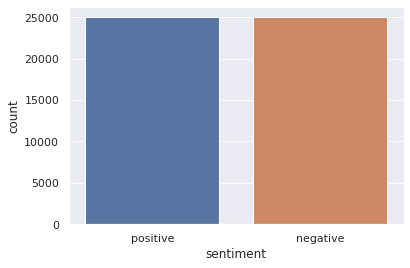

In [9]:
#Data visualisation
sns.set_theme(style='darkgrid')
sns.countplot(x=data_IMDB['sentiment'])

##Data Preprocessing

In [10]:
#Tokenization of text
tokenizer = ToktokTokenizer()
#Setting English stopwords
stopword = nltk.corpus.stopwords.words('english')

# Hi , i am Anthony '  -tokenizing->  'Hi' , ',' , 'I' , 'am' , 'Anthony' 

##Text Processor

In [11]:
#Removing the html strips 
def strip_html(text):
  soup = BeautifulSoup(text,'html.parser')
  return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]','',text)


In [12]:
#Removing the noisy text
def denoise_text(text):
  text= strip_html(text)
  text = remove_between_square_brackets(text)
  return text

#Apply function on review column
data_IMDB['review']=data_IMDB['review'].apply(denoise_text)

In [13]:
#Define function for removing special characters
def remove_special_characters(text,remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text)
  return text

#Apply function on review column
data_IMDB['review']=data_IMDB['review'].apply(remove_special_characters)

#r'[' +string.punctuation + ']'

In [14]:
data_IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [15]:
#Lemmatizing the text
def simple_lemmatize(text):
  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  return text 

#Apply function on review column 
data_IMDB['review']=data_IMDB['review'].apply(simple_lemmatize)

In [ ]:
#Example of English stopwords
stop = set(stopwords.words('english'))
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case = False):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip()for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Apply function on review column
data_IMDB['review']=data_IMDB['review'].apply(remove_stopwords)

{'each', 'she', 'being', 'so', 'having', 'very', "shan't", 'yourselves', 'over', 'her', 'didn', 'on', 'no', "should've", "she's", 'itself', 'into', 'off', "mustn't", 'own', 'these', 'other', 'is', "shouldn't", "mightn't", 'they', 'y', 'because', 'while', "hasn't", "it's", 'doesn', 'do', 'am', 'yours', 'nor', 'ain', 'against', 'only', 'once', 'there', 'some', 'between', 'don', 'isn', "weren't", 'he', 'hasn', 'about', 'for', 'from', 'an', 'mustn', 'just', "you've", 'couldn', 'you', 'was', 'did', 'then', 'were', "hadn't", 'during', 'them', 'doing', 't', 'that', 'their', 'me', 'what', 'weren', 'your', 'further', 'ourselves', 'all', 'or', "don't", 'shan', 'i', 'ma', 'here', 'out', 'as', 'hadn', 'be', 'by', 'not', 'its', 'his', 're', 'than', 'now', 'yourself', 'my', 'been', 'through', 've', "you'll", 'to', 'themselves', 'same', "wasn't", 'won', "wouldn't", 'has', 'haven', 'those', 'such', 'have', 'if', "needn't", 'the', 'will', 'll', 'myself', "won't", "doesn't", 'we', 'until', "didn't", 'an

## Text normalisation

In [ ]:
#Set a variable for the normalized dataframe and add the data_IMDB
norm_data_IMDB = data_IMDB
norm_data_IMDB

In [ ]:
norm_data_IMDB.shape

## Feature Extracttion
 1. Bag of words model 
 2. TF-IDF method 
 3. Labelling the sentiment text

### Bag of words model

In [ ]:
vect = CountVectorizer(ngram_range=(1,3)).fit(norm_data_IMDB['review'])

In [ ]:
#Getting the feature names from the vectorised features
feature_names = vect.get_feature_names()

In [ ]:
#Extract Features
X_cv = norm_data_IMDB['review']

In [ ]:
#Transforming feature data
X_cv=vect.transform(X_cv)

In [ ]:
print(X_cv)

In [ ]:
#Extract Target 
Y_cv = norm_data_IMDB['sentiment']

In [ ]:
print(X_cv.shape)

### TF-IDF method

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_tf = tfidf.fit_transform(norm_data_IMDB['review'])

In [ ]:
tfidf.get_feature_names_out()

#Hexadecimal data 

In [ ]:
print(X_tf.shape)

In [ ]:
#Extract Target
Y_tf = norm_data_IMDB['sentiment']

### Labelling the sentiment text

In [ ]:
#Labeling the sentiment data 
lb=LabelBinarizer()
#Transformed sentiment data
sentiment_data=lb.fit_transform(data_IMDB['sentiment'])
print(sentiment_data.shape)

## Machine Learning Algorithm

###Logistic Regression

In [ ]:
# Training the model 
lr = LogisticRegression()

In [ ]:
cv_scores_cv = cross_val_score(lr, X_cv, Y_cv, cv=5)

In [ ]:
cv_scores_tf = cross_val_score(lr, X_tf, Y_tf, cv=5)

In [ ]:
print(lr, 'mean accuracy: ', round(cv_scores_cv.mean()*100, 3), '% std ', round(cv_scores_cv.var()*100, 3)'%')

In [ ]:
# Split the dataset into train and test subsets. In this case, 80:20 -> Train:Test ratio
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(X_cv, Y_cv, test_size=0.2, random_state=42)

In [ ]:
print(lr, 'mean accuracy: ', round(cv_scores_tf.mean()*100, 3), '% std ', round(cv_scores_tf.var()*100, 3)'%')

In [ ]:
# Split the dataset into train and test subsets. In this case, 80:20 -> Train:Test ratio
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = train_test_split(X_tf, Y_tf, test_size=0.2, random_state=42)

####Fit the model 

In [ ]:
#Fit the model for bag of words (Count Vectorizer)
# Fill in the blanks by 9:00pm
lr_cv = lr.fit(X_train_cv,  Y_train_cv)
print(lr_cv)

In [ ]:
# Predict the model for bag of words (Count Vectorizer)
lr_cv_predict = lr.predict(X_test_cv)
print(lr_cv_predict)

####Accuracy of the model 

In [ ]:
# Accuracy of bag of words(Count Vectorizer)
lr_bow_score = accuracy_score(Y_test_cv, lr_cv_predict)
print(round(lr_bow_score*100, 2), '%')

In [ ]:
# Classification Report
lr_bow_report = classification_report(Y_test_cv, lr_cv_predict, target_names = ['Positive', 'Negative'])
print(lr_bow_report)

In [ ]:
cm_cv = confusion_matrix(Y_test_cv, lr_cv_predict, labels=lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm_cv, display_labels=lr.classes_)
display.plot()

####Mulinomial Naive Bayes

In [ ]:
#Set the variable for the model 
mnb = MultinomialNB()

In [ ]:
#Fit
mnb.fit(X_train_cv, Y_train_cv)

In [ ]:
#Predict
mnb_predict = mnb.predict(X_test_cv)
print(mnb_predict)

In [ ]:
#Accuracy Score
mnb_bow_score = accuracy_score(mnb_predict, Y_test_cv)
print('Test accuracy: {:2f}%'.format(mnb_bow_score*100))

In [ ]:
# Confusion Matrix Display
cm_mnb = confusion_matrix(Y_test_cv, mnb_predict, labels = mnb.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm_mnb, display_labels = mnb.classes_)
display.plot()